In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from library.sb_utils import save_file

In [2]:
df = pd.read_csv('data/BankChurners_EDA.csv')
df.head()

,Customer_ID,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,768805383,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,42,1.625
1,818770008,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,33,3.714
2,713982108,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,20,2.333
3,769911858,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,20,2.333
4,709106358,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,28,2.500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10120 entries, 0 to 10119
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10120 non-null  int64  
 1   Attrition_Flag            10120 non-null  object 
 2   Gender                    10120 non-null  object 
 3   Dependent_count           10120 non-null  int64  
 4   Education_Level           10120 non-null  object 
 5   Marital_Status            10120 non-null  object 
 6   Income_Category           10120 non-null  object 
 7   Card_Category             10120 non-null  object 
 8   Months_on_book            10120 non-null  int64  
 9   Total_Relationship_Count  10120 non-null  int64  
 10  Months_Inactive_12_mon    10120 non-null  int64  
 11  Contacts_Count_12_mon     10120 non-null  int64  
 12  Credit_Limit              10120 non-null  float64
 13  Total_Revolving_Bal       10120 non-null  int64  
 14  Avg_Op

There are several categorical variables in this dataset. We will convert them into dummy/indicator variables.

In [4]:
df_dummies = pd.get_dummies(df, columns=['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# drop Existing Customer dummy column and keep Attrited Customer column
df_dummies = pd.get_dummies(df_dummies, columns=['Attrition_Flag'])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10120 entries, 0 to 10119
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_ID                       10120 non-null  int64  
 1   Dependent_count                   10120 non-null  int64  
 2   Months_on_book                    10120 non-null  int64  
 3   Total_Relationship_Count          10120 non-null  int64  
 4   Months_Inactive_12_mon            10120 non-null  int64  
 5   Contacts_Count_12_mon             10120 non-null  int64  
 6   Credit_Limit                      10120 non-null  float64
 7   Total_Revolving_Bal               10120 non-null  int64  
 8   Avg_Open_To_Buy                   10120 non-null  float64
 9   Total_Amt_Chng_Q4_Q1              10120 non-null  float64
 10  Total_Trans_Ct                    10120 non-null  int64  
 11  Total_Ct_Chng_Q4_Q1               10120 non-null  float64
 12  Gend

In [5]:
df_dummies.drop('Attrition_Flag_Existing Customer', axis=1, inplace=True)
df_dummies.head()

,Customer_ID,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Attrited Customer
0,768805383,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,0,0,0,0
1,818770008,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,0,0,0,0
2,713982108,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,0,0,0,0
3,769911858,4,34,3,4,1,3313.0,2517,796.0,1.405,...,1,0,0,0,1,0,0,0,0,0
4,709106358,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,0,0,0,0


Now we need to standardize the numerical variables as they are on different scales. 

In [6]:
to_scale = [col for col in df_dummies.drop(columns=['Customer_ID']).columns if df_dummies[col].max() > 1]
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_dummies[to_scale]), columns=to_scale)
for col in scaled:
    df_dummies[col] = scaled[col]
    
df_dummies.head()

,Customer_ID,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Attrited Customer
0,768805383,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,...,0,0,1,0,0,0,0,0,0,0
1,818770008,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,...,0,0,0,0,1,0,0,0,0,0
2,713982108,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,...,0,0,0,1,0,0,0,0,0,0
3,769911858,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,...,1,0,0,0,1,0,0,0,0,0
4,709106358,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# increase limit to show all columns in dataframe
pd.set_option('display.max_columns', 500)
df_dummies.drop(columns=['Customer_ID']).describe()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Attrited Customer
count,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000,10120.000000
mean,0.469249,0.533248,0.562411,0.390201,0.409239,0.217485,0.461932,0.216340,0.223711,0.425273,0.191757,0.471245,0.044565,0.309091,0.198913,0.050988,0.146937,0.149407,0.463142,0.389625,0.073320,0.176877,0.138538,0.151680,0.351877,0.109190,0.011462,0.001976,0.054842,0.160672
std,0.259693,0.185741,0.310902,0.168451,0.184422,0.274837,0.323751,0.263458,0.064527,0.181987,0.064074,0.499197,0.206357,0.462142,0.399202,0.219984,0.354060,0.356507,0.498664,0.487689,0.260674,0.381584,0.345480,0.358728,0.477580,0.311893,0.106453,0.044414,0.227683,0.367246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.418605,0.400000,0.333333,0.333333,0.033760,0.143027,0.038261,0.185752,0.271318,0.156704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.534884,0.600000,0.333333,0.333333,0.094042,0.506953,0.100542,0.216809,0.441860,0.189015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.627907,0.800000,0.500000,0.500000,0.290980,0.708482,0.285472,0.252870,0.550388,0.220248,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now all variables have been scaled to the range of [0,1].

In [8]:
df_dummies['Attrition_Flag_Attrited Customer'].value_counts()

0    8494
1    1626
Name: Attrition_Flag_Attrited Customer, dtype: int64

As there are only about 16% of customer who churned, there is a class imbalance in this dataset. We will need to handle this imbalance using SMOTE to oversample the minority class.

For comparison, we will create a Random Forest model on the dataset and ignore the class imbalance.

In [9]:
# train-test split
X = df_dummies.drop(columns=['Attrition_Flag_Attrited Customer', 'Customer_ID'], axis=1)
y = df_dummies['Attrition_Flag_Attrited Customer']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 16.23
% Positive class in Test  = 15.57


Accuracy = 0.94
Recall = 0.67



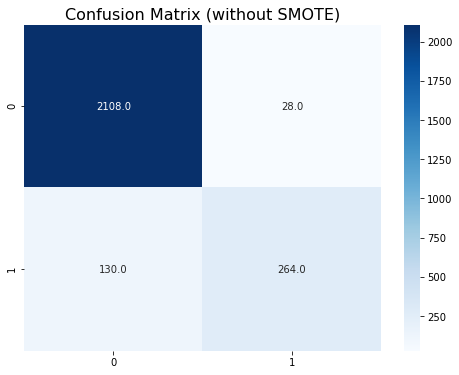

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');

As we can see, it can correctly classify almost all customers who don't churn. But it also classified 33% of churned customer as existing customer.

We'll try to improve this by oversampling the number of churned customers with SMOTE.

In [11]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10120, 29)
Shape of X after SMOTE: (16988, 29)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Attrition_Flag_Attrited Customer, dtype: float64

Accuracy = 0.96
Recall = 0.95



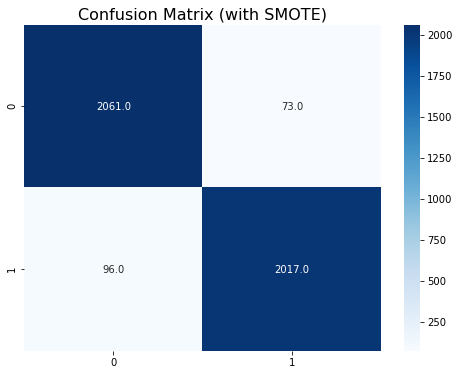

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f');

With SMOTE, only 5% of churned customers in the test set were misclassified as existing, so this is much better for modelling purposes.

In [13]:
# save updated dataframe for modelling steps
datapath = 'data'
save_file(df_dummies, 'BankChurners_preprocessed.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data\BankChurners_preprocessed.csv"
